In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()
# 0 >> Non_diabetic
# 1 >> Diabetic

,count
Outcome,
0,500
1,268


In [8]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
X = df.drop(columns='Outcome')
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 614 Test size: 154


In [26]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_acc:.3f}")


SVM Test Accuracy: 0.721


In [27]:
rf_model = RandomForestClassifier(
    n_estimators=500, max_depth=6, min_samples_split=5,
    min_samples_leaf=3, max_features='sqrt', random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_acc:.3f}")


Random Forest Test Accuracy: 0.753


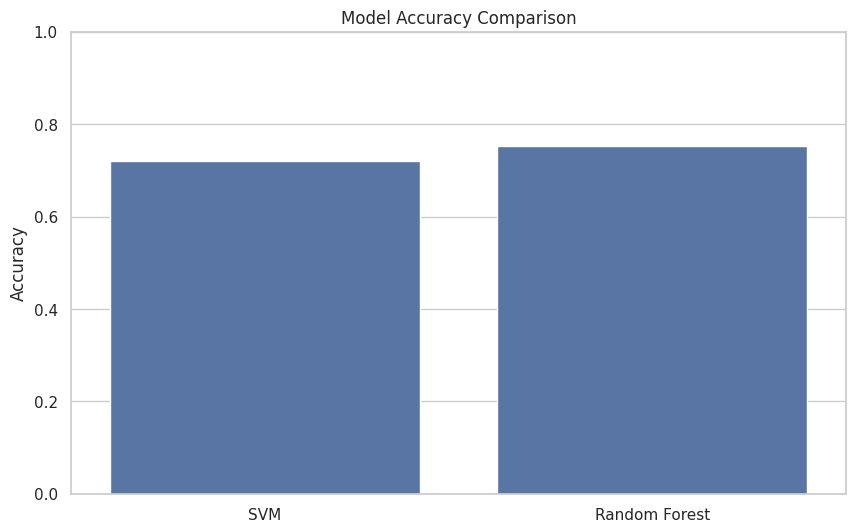

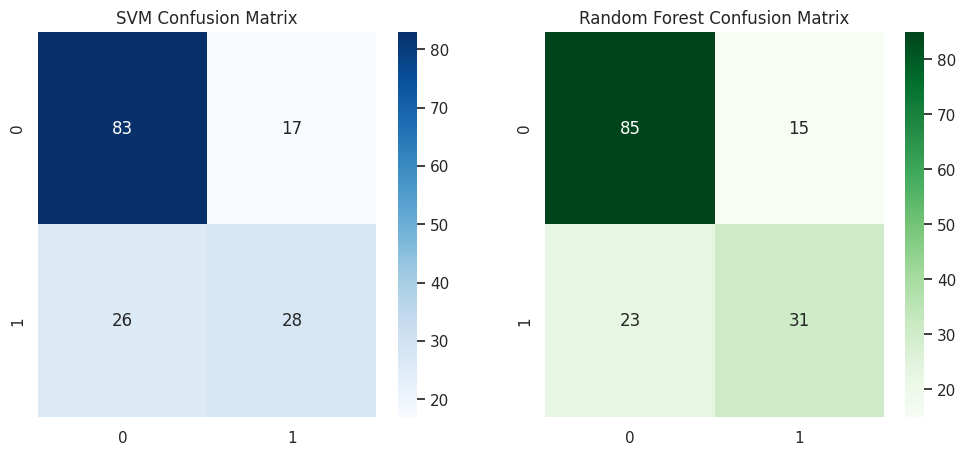

In [28]:
models = ['SVM', 'Random Forest']
accuracies = [svm_acc, rf_acc]

sns.barplot(x=models, y=accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Confusion Matrix
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("SVM Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()


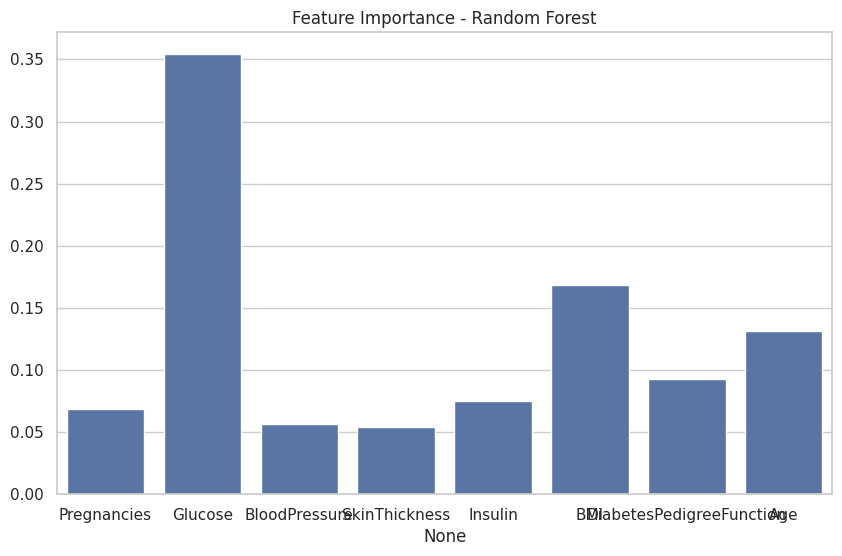

In [29]:
feature_importances = rf_model.feature_importances_
sns.barplot(x=df.columns[:-1], y=feature_importances)
plt.title("Feature Importance - Random Forest")
plt.show()


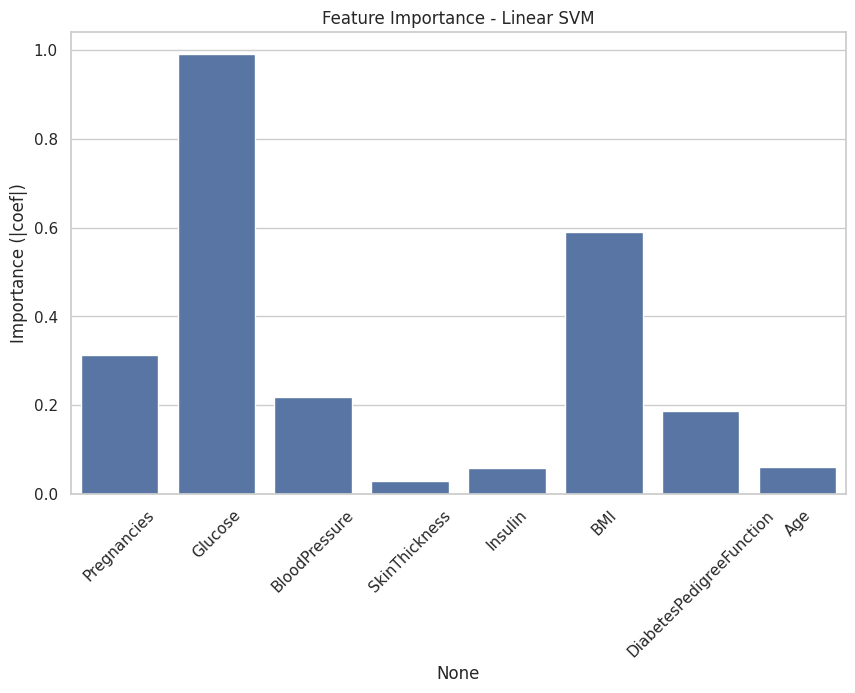

In [32]:
feature_importances = np.abs(svm_model.coef_[0])
features = df.columns[:-1]

sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance - Linear SVM")
plt.ylabel("Importance (|coef|)")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Cell: Predict Example
input_data = (6,148,72,35,0,33.6,0.627,50)
input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)
prob = rf_model.predict_proba(input_scaled)[0][1]
outcome = "Diabetic" if prob > 0.5 else "Not Diabetic"
print(f"Prediction: {outcome}, Probability: {prob:.2f}")


Prediction: Diabetic, Probability: 0.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# --- Random Forest Prediction ---
rf_prob = rf_model.predict_proba(input_scaled)[0][1]
rf_outcome = "Diabetic" if rf_prob > 0.5 else "Not Diabetic"

# --- SVM Prediction ---
svm_prob = svm_model.predict_proba(input_scaled)[0][1]
svm_outcome = "Diabetic" if svm_prob > 0.5 else "Not Diabetic"

print("Random Forest Prediction:")
print(f"Outcome: {rf_outcome}, Probability: {rf_prob:.2f}\n")

print("SVM Prediction:")
print(f"Outcome: {svm_outcome}, Probability: {svm_prob:.2f}")

Random Forest Prediction:
Outcome: Diabetic, Probability: 0.67

SVM Prediction:
Outcome: Diabetic, Probability: 0.65


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
